<a href="https://colab.research.google.com/github/jarodchristiansen/PythonProjects/blob/master/Historic_Crypto_Puller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests
!pip install pandas
!pip install numpy

In [2]:
import requests
from prettytable import PrettyTable
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

import pandas as pd
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import drive, files
drive.mount('/content/drive')
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cycles = []
urls = []
from datetime import datetime  
from datetime import timedelta  

timer = datetime.date(datetime(year=2020, month=5, day=3)) 

for i in range(1):
 timer = timer + timedelta(days=1)
 #cycles.append(timer)
 print(timer)
 urls.append('https://rest.coinapi.io/v1/ohlcv/BTC/USD/history?period_id=1DAY&time_start={}T00:00:00'.format(timer))

2020-05-04
2020-05-05
2020-05-06
2020-05-07
2020-05-08
2020-05-09
2020-05-10
2020-05-11
2020-05-12
2020-05-13
2020-05-14
2020-05-15
2020-05-16
2020-05-17
2020-05-18
2020-05-19
2020-05-20
2020-05-21
2020-05-22
2020-05-23
2020-05-24
2020-05-25
2020-05-26
2020-05-27
2020-05-28
2020-05-29
2020-05-30
2020-05-31
2020-06-01
2020-06-02
2020-06-03
2020-06-04
2020-06-05
2020-06-06
2020-06-07
2020-06-08
2020-06-09
2020-06-10
2020-06-11
2020-06-12
2020-06-13
2020-06-14
2020-06-15
2020-06-16
2020-06-17
2020-06-18
2020-06-19
2020-06-20
2020-06-21
2020-06-22
2020-06-23
2020-06-24
2020-06-25
2020-06-26
2020-06-27
2020-06-28
2020-06-29
2020-06-30
2020-07-01
2020-07-02
2020-07-03
2020-07-04
2020-07-05
2020-07-06
2020-07-07
2020-07-08
2020-07-09
2020-07-10
2020-07-11
2020-07-12
2020-07-13
2020-07-14
2020-07-15
2020-07-16
2020-07-17
2020-07-18
2020-07-19
2020-07-20
2020-07-21
2020-07-22
2020-07-23
2020-07-24
2020-07-25
2020-07-26
2020-07-27
2020-07-28
2020-07-29
2020-07-30
2020-07-31
2020-08-01


In [ ]:
cycles

[]

In [ ]:
urls

In [ ]:
apikey = ''
datas = []
headers = {
    'X-CoinAPI-Key': apikey
}
for url in urls:
 response = requests.get(url, headers=headers).json()
 datas.append(response)

In [ ]:
datas[89]

[{'price_close': 11810.07,
  'price_high': 11894.73,
  'price_low': 11228.0,
  'price_open': 11351.61,
  'time_close': '2020-08-01T23:59:59.9607290Z',
  'time_open': '2020-08-01T00:00:00.2127820Z',
  'time_period_end': '2020-08-02T00:00:00.0000000Z',
  'time_period_start': '2020-08-01T00:00:00.0000000Z',
  'trades_count': 238735,
  'volume_traded': 38179.618191884},
 {'price_close': 11173.92,
  'price_high': 12134.29,
  'price_low': 10546.15,
  'price_open': 11810.07,
  'time_close': '2020-08-02T22:30:11.3495050Z',
  'time_open': '2020-08-02T00:00:00.1568830Z',
  'time_period_end': '2020-08-03T00:00:00.0000000Z',
  'time_period_start': '2020-08-02T00:00:00.0000000Z',
  'trades_count': 252856,
  'volume_traded': 51680.403142733}]

In [ ]:
start_date = []
price_open = []
price_close = []
price_high = []
price_low = []
trades_count = []
volume_traded = []

for request in datas:
  for day in request:
    for key, value in day.items():
     if key == 'time_period_start':
       start_date.append(value.split('T')[0])
     elif key == 'price_open':
       price_open.append(value)
     elif key == 'price_close':
       price_close.append(value)
     elif key == 'price_high':
       price_high.append(value)
     elif key == 'price_low':
       price_low.append(value)
     elif key == 'trades_count':
       trades_count.append(value)
     if key == 'volume_traded':
       volume_traded.append(value)          

In [ ]:
data = pd.DataFrame()

data['Date'] = start_date
data['Open'] = price_open
data['High'] = price_high
data['Low'] = price_low
data['Close'] = price_close
data['Volume'] = volume_traded

In [ ]:
data.set_index('Date', inplace=True)

In [ ]:
data.drop(axis=1, columns='index', inplace=True)

KeyError: ignored

In [ ]:
data.to_csv('btc_data_end.csv')

In [ ]:
!ls /content/drive/My\ Drive/Colab\ Notebooks/Linear\ Regression\ SKlearn/Real\ Examples/Webscraper/
#data.to_csv('drive/My Drive/Colab Notebooks/Linear Regression SKlearn/Real Examples/Webscraper/BacklinkCheck.csv')
from openpyxl import *

import time
timer = time.strftime('%c')

#file.save('Crypto Data {}.csv'.format(timer))
data.to_csv('drive/My Drive/Colab Notebooks/Cryptos/Crypto Data/Bitcoin_Historic {}.csv'.format(timer))

'BacklinkCheckFri 02:22:11.csv'     'CoinbaseScrapeSun 01:19:29.csv'
'BacklinkCheckFri 02:22:11.gsheet'  'CoinbaseScrapeSun 01:23:13.gsheet'
'BacklinkCheckFri 02:26:36.csv'      FirstCrypto.csv
 BacklinkCheck.gsheet		     FirstCrypto.gsheet
'BacklinkCheckThu 23:08:35.csv'      UrlSamples.gsheet
'BacklinkCheckThu 23:11:08.csv'      Webscraper2.21.2020.ipynb
'BacklinkCheckThu 23:14:58.csv'      Webscraper_V0.2.ipynb
'BacklinkCheckThu 23:25:13.csv'      Webscraper_V0.4.ipynb
 BacklinkScraperV0.1.ipynb


#If data is already pre-compiled


In [6]:
btc_data = pd.read_csv('Bitcoin_Full_08-02.csv')

In [38]:
xlm_data = pd.read_csv('Stellar Lumens XLM - Sheet1.csv')

#BTC Chart, skip these sections corresponding to each crypto


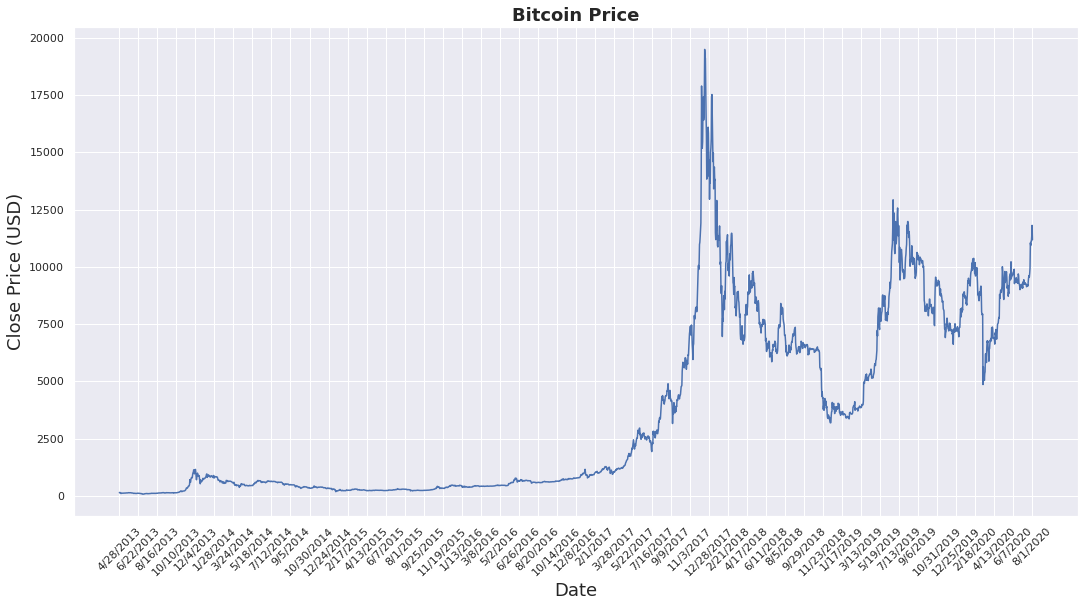

In [48]:
price = btc_data[['Close']]

plt.figure(figsize = (18,9))
plt.plot(price)
plt.xticks(range(0, btc_data.shape[0],55), btc_data['Date'].loc[::55],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

#XLM

In [ ]:
price = xlm_data[['Close']]

plt.figure(figsize = (18,9))
plt.plot(price)
plt.xticks(range(0, xlm_data.shape[0],55), xlm_data['Date'].loc[::55],rotation=45)
plt.title("XLM Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [49]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2642 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB


In [9]:
recent_price = pd.DataFrame(btc_data['Close'][-11::])

In [ ]:
recent_price

In [ ]:
type(price)

pandas.core.frame.DataFrame

In [25]:
del model

In [50]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

norm_data = min_max_scaler.fit_transform(price.values)
norm_preds = min_max_scaler.fit_transform(recent_price.values)

In [51]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [52]:
past_history = 5
future_target = 2

TRAIN_SPLIT = int(len(norm_data) * 0.8)



x_train, y_train = univariate_data(norm_data,
                                   0,
                                   TRAIN_SPLIT,
                                   past_history,
                                   future_target)

x_test, y_test = univariate_data(norm_data,
                                 TRAIN_SPLIT,
                                 None,
                                 past_history,
                                 future_target)

pred_test, y_pred = univariate_data(norm_preds, 0, None, past_history, future_target)

In [14]:
x_test

array([[[0.18298963],
        [0.18428254],
        [0.18127209],
        [0.18115371],
        [0.18056799]],

       [[0.18428254],
        [0.18127209],
        [0.18115371],
        [0.18056799],
        [0.17978668]],

       [[0.18127209],
        [0.18115371],
        [0.18056799],
        [0.17978668],
        [0.18004866]],

       ...,

       [[0.48807425],
        [0.49631555],
        [0.50813656],
        [0.56516017],
        [0.55924581]],

       [[0.49631555],
        [0.50813656],
        [0.56516017],
        [0.55924581],
        [0.56831062]],

       [[0.50813656],
        [0.56516017],
        [0.55924581],
        [0.56831062],
        [0.56861069]]])

In [15]:
pred_test

array([[[0.02746075],
        [0.        ],
        [0.07088531],
        [0.1725605 ],
        [0.66303357]],

       [[0.        ],
        [0.07088531],
        [0.1725605 ],
        [0.66303357],
        [0.61216277]],

       [[0.07088531],
        [0.1725605 ],
        [0.66303357],
        [0.61216277],
        [0.69013131]],

       [[0.1725605 ],
        [0.66303357],
        [0.61216277],
        [0.69013131],
        [0.69271225]]])

In [29]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout

num_units = 80
learning_rate = 0.0001
activation_function = 'sigmoid'
adam = Adam(lr=learning_rate)
loss_function = 'mse'
batch_size = 5
num_epochs = 125

# Initialize the RNN
model = Sequential()
model.add(LSTM(units = num_units, activation=activation_function, input_shape=(None, 1)))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.15))
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer=adam, loss=loss_function)

In [30]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 80)                26240     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 80)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
Total params: 26,321
Trainable params: 26,321
Non-trainable params: 0
_________________________________________________________________


Epoch 1/125
380/380 [==============================] - 2s 4ms/step - loss: 0.0439 - val_loss: 0.0239
Epoch 2/125
380/380 [==============================] - 1s 3ms/step - loss: 0.0434 - val_loss: 0.0322
Epoch 3/125
380/380 [==============================] - 1s 3ms/step - loss: 0.0428 - val_loss: 0.0431
Epoch 4/125
380/380 [==============================] - 1s 4ms/step - loss: 0.0431 - val_loss: 0.0354
Epoch 5/125
380/380 [==============================] - 1s 4ms/step - loss: 0.0384 - val_loss: 0.0397
Epoch 6/125
380/380 [==============================] - 1s 3ms/step - loss: 0.0366 - val_loss: 0.0336
Epoch 7/125
380/380 [==============================] - 1s 3ms/step - loss: 0.0335 - val_loss: 0.0326
Epoch 8/125
380/380 [==============================] - 1s 4ms/step - loss: 0.0311 - val_loss: 0.0315
Epoch 9/125
380/380 [==============================] - 1s 4ms/step - loss: 0.0316 - val_loss: 0.0325
Epoch 10/125
380/380 [==============================] - 1s 4ms/step - loss: 0.0292 - val_lo

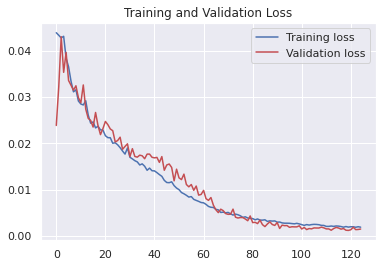

In [31]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.1,
    batch_size=batch_size,
    epochs=num_epochs,
    shuffle=False
)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

[]

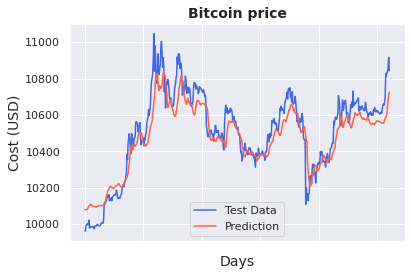

In [53]:
original = pd.DataFrame(min_max_scaler.inverse_transform(y_test))
predictions = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))

ax = sns.lineplot(x=original.index, y=original[0], label="Test Data", color='royalblue')
ax = sns.lineplot(x=predictions.index, y=predictions[0], label="Prediction", color='tomato')
ax.set_title('Bitcoin price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)

In [33]:
original

,0
0,9959.749336
1,9964.714906
2,9992.841123
3,9995.283797
4,10001.210858
...,...
517,10834.944129
518,10835.621939
519,10863.021515
520,10916.322043


In [34]:
predictions

,0
0,10080.611328
1,10079.685547
2,10078.906250
3,10079.104492
4,10080.387695
...,...
517,10607.080078
518,10652.973633
519,10679.882812
520,10707.743164


In [ ]:
len(x_test)

521

In [35]:
new_preds = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(pred_test)))

In [36]:
new_preds

,0
0,10246.458008
1,10460.385742
2,10684.315430
3,10833.903320
